In [1]:
import gc
import os
import glob
import zipfile
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import cv2
import PIL
from PIL import ImageOps, ImageFilter, ImageDraw

In [2]:
DATA_PATH = './data/splitlabel/'
IMAGE_PATH = './data/467case_cut-20190916T015832Z-001/'
os.listdir(DATA_PATH)

['test_문-격자무늬 창.xlsx',
 'test_위치-집-아래.xlsx',
 'test_위치-집-정중앙.xlsx',
 'test_지면선-벽 밑면 있지만 지면 없음.xlsx',
 'test_지붕-그물무늬 음영.xlsx',
 'test_창문-격자무늬.xlsx',
 'test_창문-많다.xlsx',
 'test_창문-창문을 가린 커튼.xlsx',
 'train_문-격자무늬 창.xlsx',
 'train_위치-집-아래.xlsx',
 'train_위치-집-정중앙.xlsx',
 'train_지면선-벽 밑면 있지만 지면 없음.xlsx',
 'train_지붕-그물무늬 음영.xlsx',
 'train_창문-격자무늬.xlsx',
 'train_창문-많다.xlsx',
 'train_창문-창문을 가린 커튼.xlsx',
 '~$test_문-격자무늬 창.xlsx',
 '문-격자무늬 창.xlsx',
 '위치-집-아래.xlsx',
 '위치-집-정중앙.xlsx',
 '지면선-벽 밑면 있지만 지면 없음.xlsx',
 '지붕-그물무늬 음영.xlsx',
 '창문-격자무늬.xlsx',
 '창문-많다.xlsx',
 '창문-창문을 가린 커튼.xlsx']

In [3]:
house = ['문-격자무늬 창',
 '위치-집-아래',
 '위치-집-정중앙',
 '지면선-벽 밑면 있지만 지면 없음',
 '지붕-그물무늬 음영',
 '창문-격자무늬',
 '창문-많다',
 '창문-창문을 가린 커튼']

In [4]:
TRAIN_CROP_PATH = './train_crop'
TRAIN_IMG_PATH = os.path.join(IMAGE_PATH,'house')


df_train = []
df_test = []
for excel_name in house:
    df_train.append(pd.read_excel(os.path.join(DATA_PATH,'train_' + excel_name + '.xlsx')))
    df_train[house.index(excel_name)]['data'] = df_train[house.index(excel_name)].data.apply(lambda x: f'{x:0>4}')
    df_test.append(pd.read_excel(os.path.join(DATA_PATH,'test_' + excel_name + '.xlsx')))
    df_test[house.index(excel_name)]['data'] = df_test[house.index(excel_name)].data.apply(lambda x: f'{x:0>4}')
    
    

In [5]:
for i in range(len(house)):
    print(df_train[i].head(5))
    print(df_test[i].head(5))

   Unnamed: 0        data  문-격자무늬 창
0         144  0270_H.jpg         0
1          70  0117_H.jpg         0
2         138  0261_H.jpg         0
3         131  0243_H.jpg         0
4         214  0415_H.jpg         0
   Unnamed: 0        data  문-격자무늬 창
0         170  0319_H.jpg         0
1          51  0089_H.jpg         0
2          36  0062_H.jpg         0
3           8  0012_H.jpg         0
4         132  0248_H.jpg         0
   Unnamed: 0        data  위치-집-아래
0          79  0132_H.jpg        0
1         188  0360_H.jpg        0
2          25  0043_H.jpg        0
3          53  0091_H.jpg        0
4         169  0318_H.jpg        0
   Unnamed: 0        data  위치-집-아래
0         227  0432_H.jpg        0
1         177  0335_H.jpg        0
2         221  0424_H.jpg        1
3         167  0315_H.jpg        1
4         283  0519_H.jpg        1
   Unnamed: 0        data  위치-집-정중앙
0         165  0311_H.jpg         0
1          25  0043_H.jpg         0
2         245  0463_H.jpg         0
3   

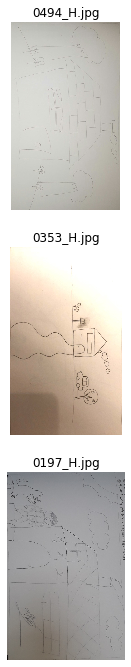

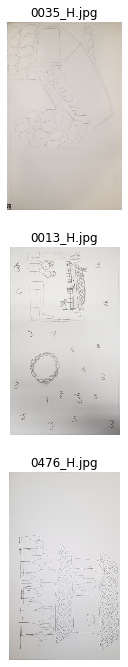

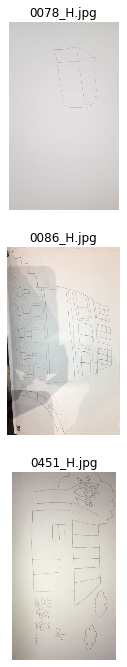

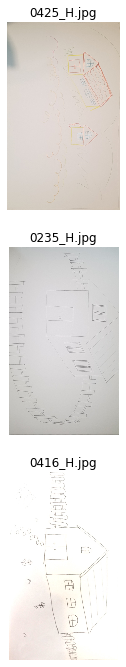

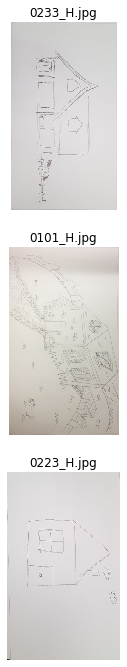

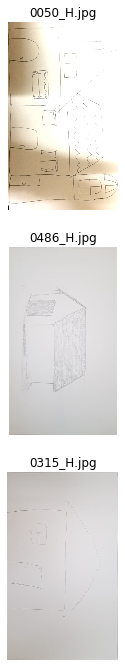

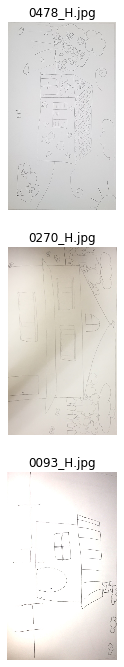

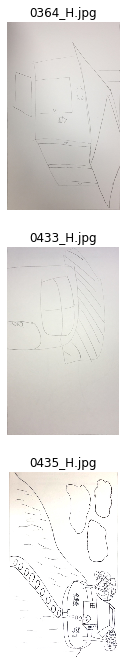

In [7]:
for i in range(len(df_train)):
    tmp_imgs = df_train[i]['data'][100:103]
    plt.figure(figsize=(12,20))

    for num, f_name in enumerate(tmp_imgs):
        img = PIL.Image.open(os.path.join(TRAIN_IMG_PATH, f_name))
        plt.subplot(5, 2, 2*num + 1)
        plt.title(f_name)
        plt.imshow(img)
        plt.axis('off')

In [10]:
from sklearn.model_selection import train_test_split

X_train = []
X_val = []

for i, data in enumerate(house):

    df_train[i][data] = df_train[i][data].astype('str')

    df_train[i] = df_train[i][['data', data]]
    df_test[i] = df_test[i][['data']]

    its = np.arange(df_train[i].shape[0])
    train_idx, val_idx = train_test_split(its, train_size = 0.8, random_state=42)

    X_train.append(df_train[i].iloc[train_idx, :])
    X_val.append(df_train[i].iloc[val_idx, :])

    print(data)
    print(X_train[i].shape)
    print(X_val[i].shape)
    print(df_train[i].shape)
    print("="*20)

문-격자무늬 창
(190, 2)
(48, 2)
(238, 2)
위치-집-아래
(190, 2)
(48, 2)
(238, 2)
위치-집-정중앙
(190, 2)
(48, 2)
(238, 2)
지면선-벽 밑면 있지만 지면 없음
(190, 2)
(48, 2)
(238, 2)
지붕-그물무늬 음영
(190, 2)
(48, 2)
(238, 2)
창문-격자무늬
(190, 2)
(48, 2)
(238, 2)
창문-많다
(190, 2)
(48, 2)
(238, 2)
창문-창문을 가린 커튼
(190, 2)
(48, 2)
(238, 2)


In [11]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [22]:

epochs = 20
batch_size = 32
img_size = (224, 224)
# Define Generator config
train_datagen = ImageDataGenerator(
    horizontal_flip = False, 
    vertical_flip = False,
    preprocessing_function=preprocess_input
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = []
validation_generator = []
test_generator = []

nb_train_samples = []
nb_validation_samples = []
nb_test_samples = []

for i, num in enumerate(house):
    nb_train_samples.append(len(X_train[i]))
    nb_validation_samples.append(len(X_val[i]))
    nb_test_samples.append(len(df_train[i]))
    
    
    # Make Generator
    train_generator.append(train_datagen.flow_from_dataframe(
        dataframe=X_train[i], 
        directory=TRAIN_IMG_PATH,
        x_col = 'data',
        y_col = house[i],
        target_size = img_size,
        color_mode='rgb',
        class_mode='categorical',
        batch_size=batch_size,
        seed=42
    ))

    validation_generator.append(val_datagen.flow_from_dataframe(
        dataframe=X_val[i], 
        directory=TRAIN_IMG_PATH,
        x_col='data',
        y_col=house[i],
        target_size=img_size,
        color_mode='rgb',
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=False
    ))

    test_generator.append(test_datagen.flow_from_dataframe(
        dataframe=df_test[i],
        directory=TRAIN_IMG_PATH,
        x_col='data',
        y_col=None,
        target_size= img_size,
        color_mode='rgb',
        class_mode=None,
        batch_size=batch_size,
        shuffle=False
    ))

Found 190 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 59 validated image filenames.
Found 190 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 59 validated image filenames.
Found 190 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 59 validated image filenames.
Found 189 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 60 validated image filenames.
Found 190 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 59 validated image filenames.
Found 190 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 59 validated image filenames.
Found 190 validated image filenames belonging to 2 classes.
Found 48 v

In [17]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, GlobalAveragePooling2D

In [18]:
mobileNetModel = MobileNet(weights='imagenet', include_top=False)

model = Sequential()
model.add(mobileNetModel)
model.add(GlobalAveragePooling2D())
model.add(Dense(2, activation='softmax',kernel_initializer='he_normal'))
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2050      
Total params: 3,230,914
Trainable params: 3,209,026
Non-trainable params: 21,888
_________________________________________________________________


In [19]:
from sklearn.metrics import f1_score

def micro_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average='micro')

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [20]:
def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0:
        return (num_samples // batch_size) + 1
    else : 
        return num_samples // batch_size

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

history = []

for i, ename in enumerate(house):
    filepath = ename + "_mobile_model_{val_acc:.2f}_{val_loss:.4f}.h5"

    ckpt = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True)
    es = EarlyStopping(monitor='val_acc', min_delta=0, patience=3, verbose=1, mode='auto')

    callbackList = [ckpt]

    history.append(model.fit_generator(
        train_generator[i],
        steps_per_epoch = get_steps(nb_train_samples[i], batch_size),
        epochs=epochs,
        validation_data = validation_generator[i],
        validation_steps = get_steps(nb_validation_samples[i], batch_size),
        callbacks = callbackList
    ))
    gc.collect()

Epoch 1/20
5/6 [========================>.....] - ETA: 1:22 - loss: 0.6664 - acc: 0.633 - ETA: 56s - loss: 0.5807 - acc: 0.725 - ETA: 40s - loss: 0.4315 - acc: 0.79 - ETA: 25s - loss: 0.3925 - acc: 0.83 - ETA: 12s - loss: 0.3251 - acc: 0.8671
Epoch 00001: val_acc improved from -inf to 0.04167, saving model to 문-격자무늬 창_mobile_model_0.04_6.1470.h5
6/6 [==============================] - 79s 13s/step - loss: 0.3066 - acc: 0.8737 - val_loss: 6.1470 - val_acc: 0.0417
Epoch 2/20
5/6 [========================>.....] - ETA: 1:00 - loss: 0.2562 - acc: 0.937 - ETA: 47s - loss: 0.1458 - acc: 0.968 - ETA: 35s - loss: 0.1444 - acc: 0.95 - ETA: 23s - loss: 0.1191 - acc: 0.96 - ETA: 11s - loss: 0.1104 - acc: 0.9688
Epoch 00002: val_acc improved from 0.04167 to 0.97917, saving model to 문-격자무늬 창_mobile_model_0.98_0.2265.h5
6/6 [==============================] - 73s 12s/step - loss: 0.1093 - acc: 0.9684 - val_loss: 0.2265 - val_acc: 0.9792
Epoch 3/20
5/6 [========================>.....] - ETA: 1:00 - los

Epoch 20/20
5/6 [========================>.....] - ETA: 59s - loss: 1.2427e-05 - acc: 1.00 - ETA: 47s - loss: 1.3639e-05 - acc: 1.00 - ETA: 35s - loss: 2.4194e-05 - acc: 1.00 - ETA: 23s - loss: 2.0624e-05 - acc: 1.00 - ETA: 11s - loss: 1.9806e-05 - acc: 1.0000
Epoch 00020: val_acc did not improve from 0.97917
6/6 [==============================] - 73s 12s/step - loss: 1.7928e-05 - acc: 1.0000 - val_loss: 0.4071 - val_acc: 0.9792
Epoch 1/20
5/6 [========================>.....] - ETA: 1:05 - loss: 4.0004 - acc: 0.687 - ETA: 49s - loss: 3.2189 - acc: 0.703 - ETA: 36s - loss: 3.2958 - acc: 0.67 - ETA: 24s - loss: 2.8958 - acc: 0.71 - ETA: 11s - loss: 2.6182 - acc: 0.7215
Epoch 00001: val_acc improved from -inf to 0.83333, saving model to 위치-집-아래_mobile_model_0.83_8.8635.h5
6/6 [==============================] - 74s 12s/step - loss: 2.4332 - acc: 0.7263 - val_loss: 8.8635 - val_acc: 0.8333
Epoch 2/20
5/6 [========================>.....] - ETA: 59s - loss: 0.4866 - acc: 0.84 - ETA: 47s - los

5/6 [========================>.....] - ETA: 1:00 - loss: 1.2419e-04 - acc: 1.000 - ETA: 48s - loss: 8.3747e-05 - acc: 1.000 - ETA: 35s - loss: 1.5210e-04 - acc: 1.00 - ETA: 23s - loss: 2.2673e-04 - acc: 1.00 - ETA: 11s - loss: 2.4008e-04 - acc: 1.0000
Epoch 00019: val_acc did not improve from 0.83333
6/6 [==============================] - 73s 12s/step - loss: 2.5647e-04 - acc: 1.0000 - val_loss: 2.9641 - val_acc: 0.8125
Epoch 20/20
5/6 [========================>.....] - ETA: 59s - loss: 2.6574e-04 - acc: 1.00 - ETA: 47s - loss: 2.5784e-04 - acc: 1.00 - ETA: 35s - loss: 2.0172e-04 - acc: 1.00 - ETA: 23s - loss: 2.2773e-04 - acc: 1.00 - ETA: 11s - loss: 2.3028e-04 - acc: 1.0000
Epoch 00020: val_acc did not improve from 0.83333
6/6 [==============================] - 73s 12s/step - loss: 2.0570e-04 - acc: 1.0000 - val_loss: 2.7006 - val_acc: 0.8125
Epoch 1/20
5/6 [========================>.....] - ETA: 1:04 - loss: 3.2895 - acc: 0.625 - ETA: 49s - loss: 2.7889 - acc: 0.640 - ETA: 35s - los

6/6 [==============================] - 73s 12s/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.0770 - val_acc: 0.9167
Epoch 19/20
5/6 [========================>.....] - ETA: 59s - loss: 9.9868e-04 - acc: 1.00 - ETA: 45s - loss: 8.1697e-04 - acc: 1.00 - ETA: 34s - loss: 8.3086e-04 - acc: 1.00 - ETA: 23s - loss: 7.6694e-04 - acc: 1.00 - ETA: 11s - loss: 8.8408e-04 - acc: 1.0000
Epoch 00019: val_acc did not improve from 0.91667
6/6 [==============================] - 73s 12s/step - loss: 9.4276e-04 - acc: 1.0000 - val_loss: 1.0671 - val_acc: 0.9167
Epoch 20/20
5/6 [========================>.....] - ETA: 1:06 - loss: 9.3632e-04 - acc: 1.000 - ETA: 51s - loss: 0.0010 - acc: 1.0000    - ETA: 39s - loss: 8.9633e-04 - acc: 1.00 - ETA: 25s - loss: 0.0012 - acc: 1.0000   - ETA: 12s - loss: 0.0012 - acc: 1.0000
Epoch 00020: val_acc did not improve from 0.91667
6/6 [==============================] - 78s 13s/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.0585 - val_acc: 0.9167
Epoch 1/20
5/6 [=====

5/6 [========================>.....] - ETA: 59s - loss: 0.0040 - acc: 1.00 - ETA: 47s - loss: 0.0025 - acc: 1.00 - ETA: 34s - loss: 0.0022 - acc: 1.00 - ETA: 23s - loss: 0.0023 - acc: 1.00 - ETA: 11s - loss: 0.0020 - acc: 1.0000
Epoch 00018: val_acc did not improve from 0.72917
6/6 [==============================] - 74s 12s/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.9834 - val_acc: 0.7083
Epoch 19/20
5/6 [========================>.....] - ETA: 1:03 - loss: 0.0029 - acc: 1.000 - ETA: 52s - loss: 0.0027 - acc: 1.000 - ETA: 37s - loss: 0.0026 - acc: 1.00 - ETA: 24s - loss: 0.0033 - acc: 1.00 - ETA: 12s - loss: 0.0029 - acc: 1.0000
Epoch 00019: val_acc did not improve from 0.72917
6/6 [==============================] - 76s 13s/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.9791 - val_acc: 0.7083
Epoch 20/20
5/6 [========================>.....] - ETA: 1:00 - loss: 0.0024 - acc: 1.000 - ETA: 48s - loss: 0.0019 - acc: 1.000 - ETA: 34s - loss: 0.0015 - acc: 1.00 - ETA: 23s - loss: 0.0015

5/6 [========================>.....] - ETA: 1:00 - loss: 0.0042 - acc: 1.000 - ETA: 47s - loss: 0.0037 - acc: 1.000 - ETA: 35s - loss: 0.0061 - acc: 1.00 - ETA: 24s - loss: 0.0054 - acc: 1.00 - ETA: 12s - loss: 0.0067 - acc: 1.0000
Epoch 00017: val_acc did not improve from 0.83333
6/6 [==============================] - 75s 13s/step - loss: 0.0072 - acc: 1.0000 - val_loss: 1.0385 - val_acc: 0.8333
Epoch 18/20
5/6 [========================>.....] - ETA: 1:02 - loss: 0.0029 - acc: 1.000 - ETA: 50s - loss: 0.0046 - acc: 1.000 - ETA: 37s - loss: 0.0069 - acc: 1.00 - ETA: 24s - loss: 0.0097 - acc: 1.00 - ETA: 12s - loss: 0.0261 - acc: 0.9937
Epoch 00018: val_acc did not improve from 0.83333
6/6 [==============================] - 75s 13s/step - loss: 0.0259 - acc: 0.9947 - val_loss: 0.9950 - val_acc: 0.8333
Epoch 19/20
5/6 [========================>.....] - ETA: 1:00 - loss: 0.0079 - acc: 1.000 - ETA: 47s - loss: 0.0156 - acc: 1.000 - ETA: 35s - loss: 0.0117 - acc: 1.00 - ETA: 23s - loss: 0.0

5/6 [========================>.....] - ETA: 59s - loss: 0.0047 - acc: 1.00 - ETA: 46s - loss: 0.0071 - acc: 1.00 - ETA: 35s - loss: 0.0086 - acc: 1.00 - ETA: 23s - loss: 0.0074 - acc: 1.00 - ETA: 11s - loss: 0.0071 - acc: 1.0000
Epoch 00016: val_acc did not improve from 0.77083
6/6 [==============================] - 72s 12s/step - loss: 0.0067 - acc: 1.0000 - val_loss: 1.0279 - val_acc: 0.7708
Epoch 17/20
5/6 [========================>.....] - ETA: 58s - loss: 0.0066 - acc: 1.00 - ETA: 44s - loss: 0.0066 - acc: 1.00 - ETA: 34s - loss: 0.0060 - acc: 1.00 - ETA: 22s - loss: 0.0066 - acc: 1.00 - ETA: 11s - loss: 0.0059 - acc: 1.0000
Epoch 00017: val_acc did not improve from 0.77083
6/6 [==============================] - 71s 12s/step - loss: 0.0059 - acc: 1.0000 - val_loss: 1.0131 - val_acc: 0.7500
Epoch 18/20
5/6 [========================>.....] - ETA: 58s - loss: 0.0046 - acc: 1.00 - ETA: 45s - loss: 0.0069 - acc: 1.00 - ETA: 34s - loss: 0.0062 - acc: 1.00 - ETA: 22s - loss: 0.0057 - acc

Epoch 16/20
5/6 [========================>.....] - ETA: 57s - loss: 0.0098 - acc: 1.00 - ETA: 46s - loss: 0.0088 - acc: 1.00 - ETA: 33s - loss: 0.0082 - acc: 1.00 - ETA: 22s - loss: 0.0108 - acc: 1.00 - ETA: 11s - loss: 0.0120 - acc: 1.0000
Epoch 00016: val_acc did not improve from 0.79167
6/6 [==============================] - 71s 12s/step - loss: 0.0114 - acc: 1.0000 - val_loss: 0.9826 - val_acc: 0.6458
Epoch 17/20
5/6 [========================>.....] - ETA: 57s - loss: 0.0080 - acc: 1.00 - ETA: 46s - loss: 0.0078 - acc: 1.00 - ETA: 34s - loss: 0.0068 - acc: 1.00 - ETA: 22s - loss: 0.0078 - acc: 1.00 - ETA: 11s - loss: 0.0076 - acc: 1.0000
Epoch 00017: val_acc did not improve from 0.79167
6/6 [==============================] - 71s 12s/step - loss: 0.0078 - acc: 1.0000 - val_loss: 1.0104 - val_acc: 0.6458
Epoch 18/20
5/6 [========================>.....] - ETA: 57s - loss: 0.0106 - acc: 1.00 - ETA: 45s - loss: 0.0082 - acc: 1.00 - ETA: 34s - loss: 0.0084 - acc: 1.00 - ETA: 22s - loss: 

Epoch 00015: val_acc did not improve from 0.83333
6/6 [==============================] - 71s 12s/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.8318 - val_acc: 0.8333
Epoch 16/20
5/6 [========================>.....] - ETA: 57s - loss: 0.0054 - acc: 1.00 - ETA: 44s - loss: 0.0060 - acc: 1.00 - ETA: 33s - loss: 0.0050 - acc: 1.00 - ETA: 22s - loss: 0.0051 - acc: 1.00 - ETA: 11s - loss: 0.0048 - acc: 1.0000
Epoch 00016: val_acc did not improve from 0.83333
6/6 [==============================] - 71s 12s/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.8303 - val_acc: 0.8333
Epoch 17/20
5/6 [========================>.....] - ETA: 58s - loss: 0.0036 - acc: 1.00 - ETA: 44s - loss: 0.0040 - acc: 1.00 - ETA: 33s - loss: 0.0037 - acc: 1.00 - ETA: 22s - loss: 0.0037 - acc: 1.00 - ETA: 11s - loss: 0.0041 - acc: 1.0000
Epoch 00017: val_acc improved from 0.83333 to 0.85417, saving model to 창문-창문을 가린 커튼_mobile_model_0.85_0.8261.h5
6/6 [==============================] - 71s 12s/step - loss: 0.0040 - a

문-격자무늬 창


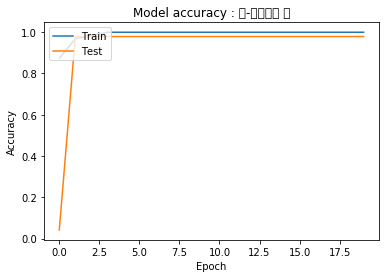

위치-집-아래


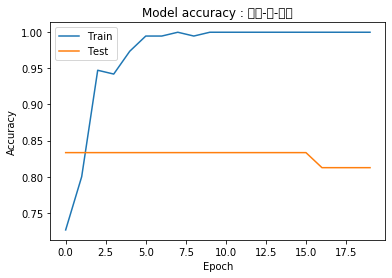

위치-집-정중앙


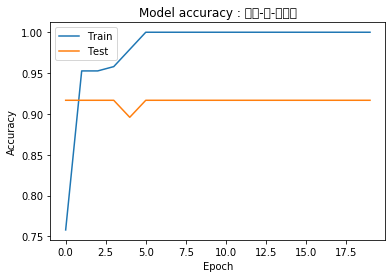

지면선-벽 밑면 있지만 지면 없음


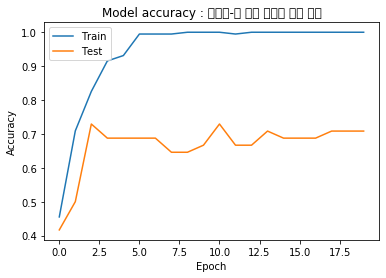

지붕-그물무늬 음영


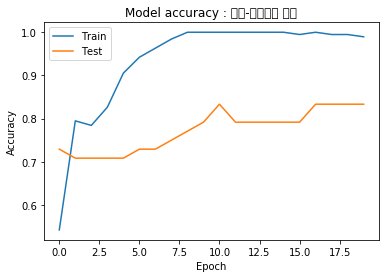

창문-격자무늬


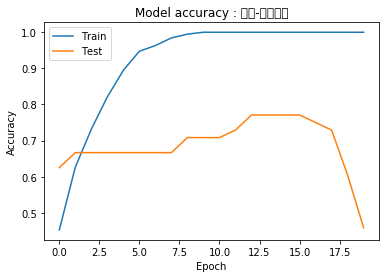

창문-많다


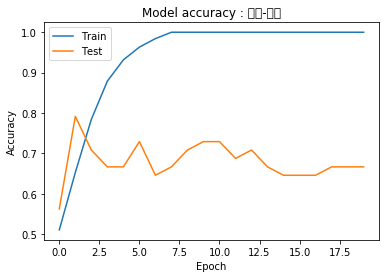

창문-창문을 가린 커튼


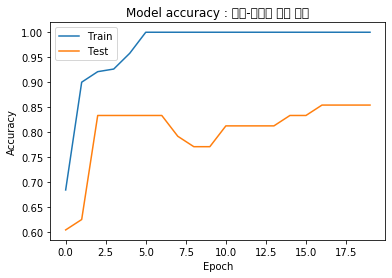

In [32]:
for i, data in enumerate(house):
    print(data)
    plt.plot(history[i].history['acc'])
    plt.plot(history[i].history['val_acc'])
    plt.title('Model accuracy : ' + data)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

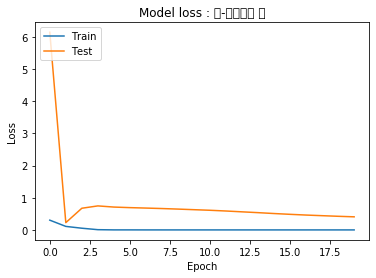

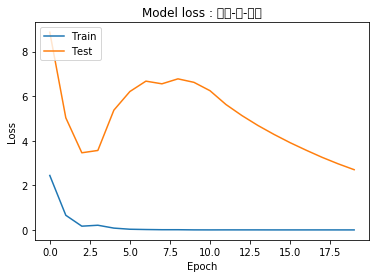

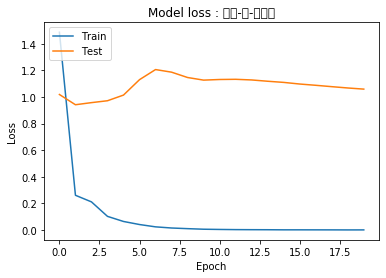

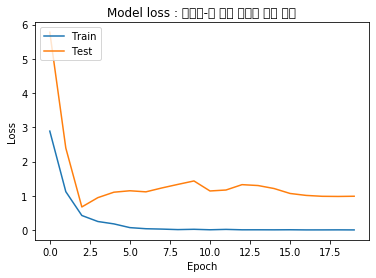

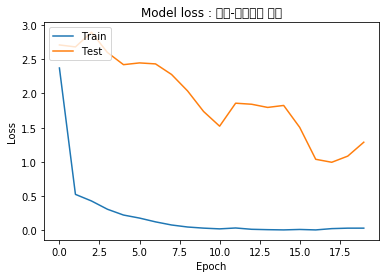

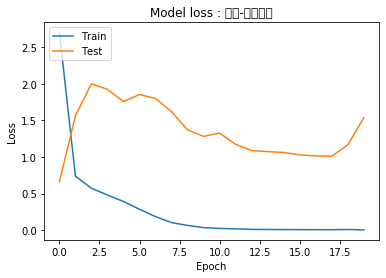

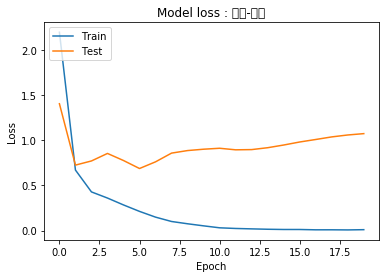

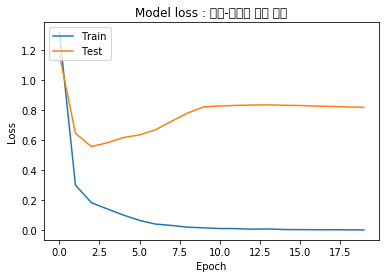

In [33]:
# Plot training & validation loss values
for i, data in enumerate(house):
    plt.plot(history[i].history['loss'])
    plt.plot(history[i].history['val_loss'])
    plt.title('Model loss : ' + data)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [ ]:
model_list = sorted([i for i in os.listdir() if "my_" in i])
model_list

In [ ]:
model.load_weights(model_list[-1])

In [ ]:
test_generator.reset()
prediction = model.predict_generator(
    generator = test_generator,
    steps = get_steps(nb_test_samples, batch_size),
    verbose=1
)

In [ ]:
predicted_class_indices=np.argmax(prediction, axis=1)

# Generator class dictionary mapping
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

submission = pd.read_csv(os.path.join(DATA_PATH, 'sample_submission.csv'))
submission["class"] = predictions
submission.to_csv("submission.csv", index=False)
submission.head()